In [1]:
!pip install pyspark


In [2]:
import pyspark
print("PySpark version:", pyspark.__version__)


PySpark version: 3.5.3


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


In [4]:
spark = SparkSession.builder.appName("Big Data Analysis").getOrCreate()


In [28]:
df = spark.read.csv("food-price-index-september-2023-seasonally-adjusted.csv", header=True, inferSchema=True)


In [29]:
df.printSchema()


root
 |-- Series_reference: string (nullable = true)
 |-- Period: double (nullable = true)
 |-- Data_value: integer (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- UNITS: string (nullable = true)
 |-- Subject: string (nullable = true)
 |-- Group: string (nullable = true)
 |-- Series_title_1: string (nullable = true)



In [30]:
df.show(5)


+----------------+-------+----------+-------+-----+--------------------+--------------------+-------------------+
|Series_reference| Period|Data_value| STATUS|UNITS|             Subject|               Group|     Series_title_1|
+----------------+-------+----------+-------+-----+--------------------+--------------------+-------------------+
|     CPIM.SE9S01|1999.06|       645|REVISED|Index|Consumers Price I...|Food Price Index ...|Seasonally adjusted|
|     CPIM.SE9S01|1999.07|       647|REVISED|Index|Consumers Price I...|Food Price Index ...|Seasonally adjusted|
|     CPIM.SE9S01|1999.08|       645|REVISED|Index|Consumers Price I...|Food Price Index ...|Seasonally adjusted|
|     CPIM.SE9S01|1999.09|       644|REVISED|Index|Consumers Price I...|Food Price Index ...|Seasonally adjusted|
|     CPIM.SE9S01| 1999.1|       641|REVISED|Index|Consumers Price I...|Food Price Index ...|Seasonally adjusted|
+----------------+-------+----------+-------+-----+--------------------+----------------

In [32]:
df.select("Series_title_1").show()

+-------------------+
|     Series_title_1|
+-------------------+
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
|Seasonally adjusted|
+-------------------+
only showing top 20 rows



In [35]:
# Check the actual column names in your DataFrame
df.printSchema()

# Assuming the correct column name is 'Series_title_1' based on previous code:
df.filter(col("Series_title_1").contains("April")).show()

root
 |-- Series_reference: string (nullable = true)
 |-- Period: double (nullable = true)
 |-- Data_value: integer (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- UNITS: string (nullable = true)
 |-- Subject: string (nullable = true)
 |-- Group: string (nullable = true)
 |-- Series_title_1: string (nullable = true)

+----------------+------+----------+------+-----+-------+-----+--------------+
|Series_reference|Period|Data_value|STATUS|UNITS|Subject|Group|Series_title_1|
+----------------+------+----------+------+-----+-------+-----+--------------+
+----------------+------+----------+------+-----+-------+-----+--------------+



In [37]:
df.groupBy("Group").count().show()

+--------------------+-----+
|               Group|count|
+--------------------+-----+
|Food Price Index ...| 1040|
|Food Price Index ...|  292|
|Food Price Index ...| 2912|
+--------------------+-----+



In [39]:
df.groupBy("Group").count().show()

+--------------------+-----+
|               Group|count|
+--------------------+-----+
|Food Price Index ...| 1040|
|Food Price Index ...|  292|
|Food Price Index ...| 2912|
+--------------------+-----+



In [41]:
from pyspark.sql.functions import avg, col # Import the avg function

df.agg(avg("Data_value")).show()

+-----------------+
|  avg(Data_value)|
+-----------------+
|963.7535958500354|
+-----------------+



In [42]:
df.groupBy("Group").count().orderBy(col("count").desc()).show()

+--------------------+-----+
|               Group|count|
+--------------------+-----+
|Food Price Index ...| 2912|
|Food Price Index ...| 1040|
|Food Price Index ...|  292|
+--------------------+-----+



In [44]:
df.write.mode("overwrite").csv("output_folder", header=True)

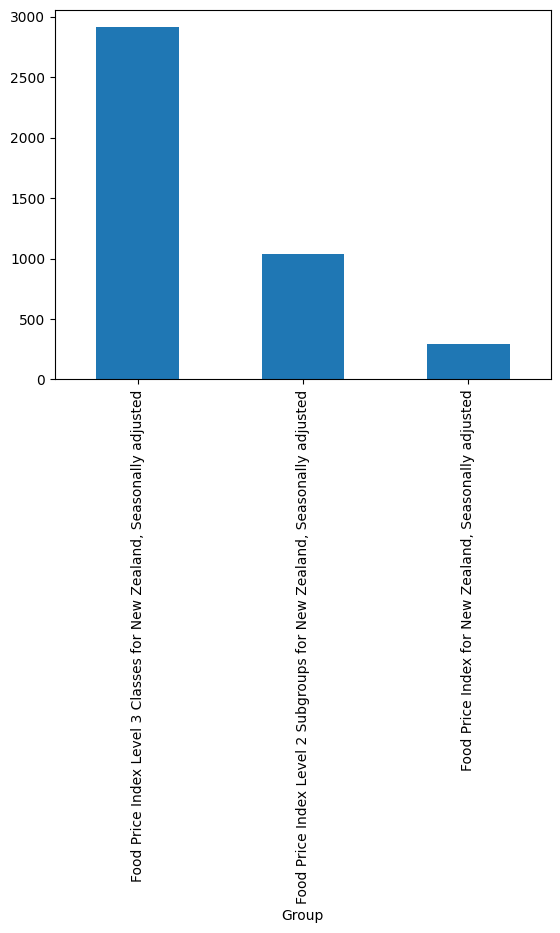

In [46]:
import pandas as pd

pandas_df = df.toPandas()

import matplotlib.pyplot as plt

pandas_df['Group'].value_counts().plot(kind='bar')
plt.show()